# Apprentissage supervisé, Arbres de décision et Forêts aléatoires

In [19]:
# !pip3 install --upgrade scikit-learn==0.20.3
!pip3 install scikit-learn==0.22.2

In [20]:
import numpy as np
import pandas as pa
import warnings
warnings.filterwarnings("ignore")

### Exercice 1 : Arbres de décision (à la main)

In [21]:
exemple_cours = pa.DataFrame(data={'A': [0, 0, 1, 1],
                                  'B': [1, 0, 1, 0],
                                  'Classe': ['C1', 'C1', 'C2', 'C2']})

1.

In [22]:
def information(dataset, label_feature):
  pass

2.

In [23]:
def entropy(dataset, feature, label_feature):
  pass

3.

In [24]:
def gain(dataset, feature, label_feature):
  pass

4.

5.

### Exercice 1 : Arbres de décision (sklearn)

In [25]:
data = pa.read_csv("https://www.labri.fr/perso/zemmari/datasets/titanic.csv", sep=",")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
dataset = data.dropna()
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [27]:
selected_cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

Je trouve que les descripteurs suivant ne sont pas pertinents :
- `name` car ça ne change rien en situation urgente
- `PassengerId` ça ne change rien
- `Ticket` peut d'importance car on as déjà la classe et les chambre seront bientôt sous l'eau
- `Cabine` bientôt sous l'eau
- `Embarked` inutile car on coule

Je garde les descripteurs suivant :
- `Sex` car il a un impacte "les femmes et les enfants d'abord"
- `Age` car il a un impacte "les enfants d'abord"
- `Survived` car c'est la variable à prédire
- `Pclass` niveau de richesse. ça a toujours un impact
- `SibSp` peut avoir in impact car les gens sont grouper dons potentiellement sauver en même temps
- `Parch` same as up
- `Fare` a de l'impacte car la richesse pour payer des passe droit

In [28]:
from sklearn import preprocessing

cols = ['Sex', 'Embarked']
le = preprocessing.LabelEncoder()
for c in cols:
    le.fit(dataset[c])
    dataset[c] = le.transform(dataset[c])
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2


In [29]:
X = dataset[selected_cols]
Y = dataset["Survived"]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(len(X_train), str(len(X_train) * 100 / len(X)) + "%")
print(len(X_test), str(len(X_test) * 100 / len(X)) + "%")

146 79.78142076502732%
37 20.218579234972676%


In [31]:
from sklearn.tree import DecisionTreeClassifier
# Classifieur Decision Tree
dt= DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

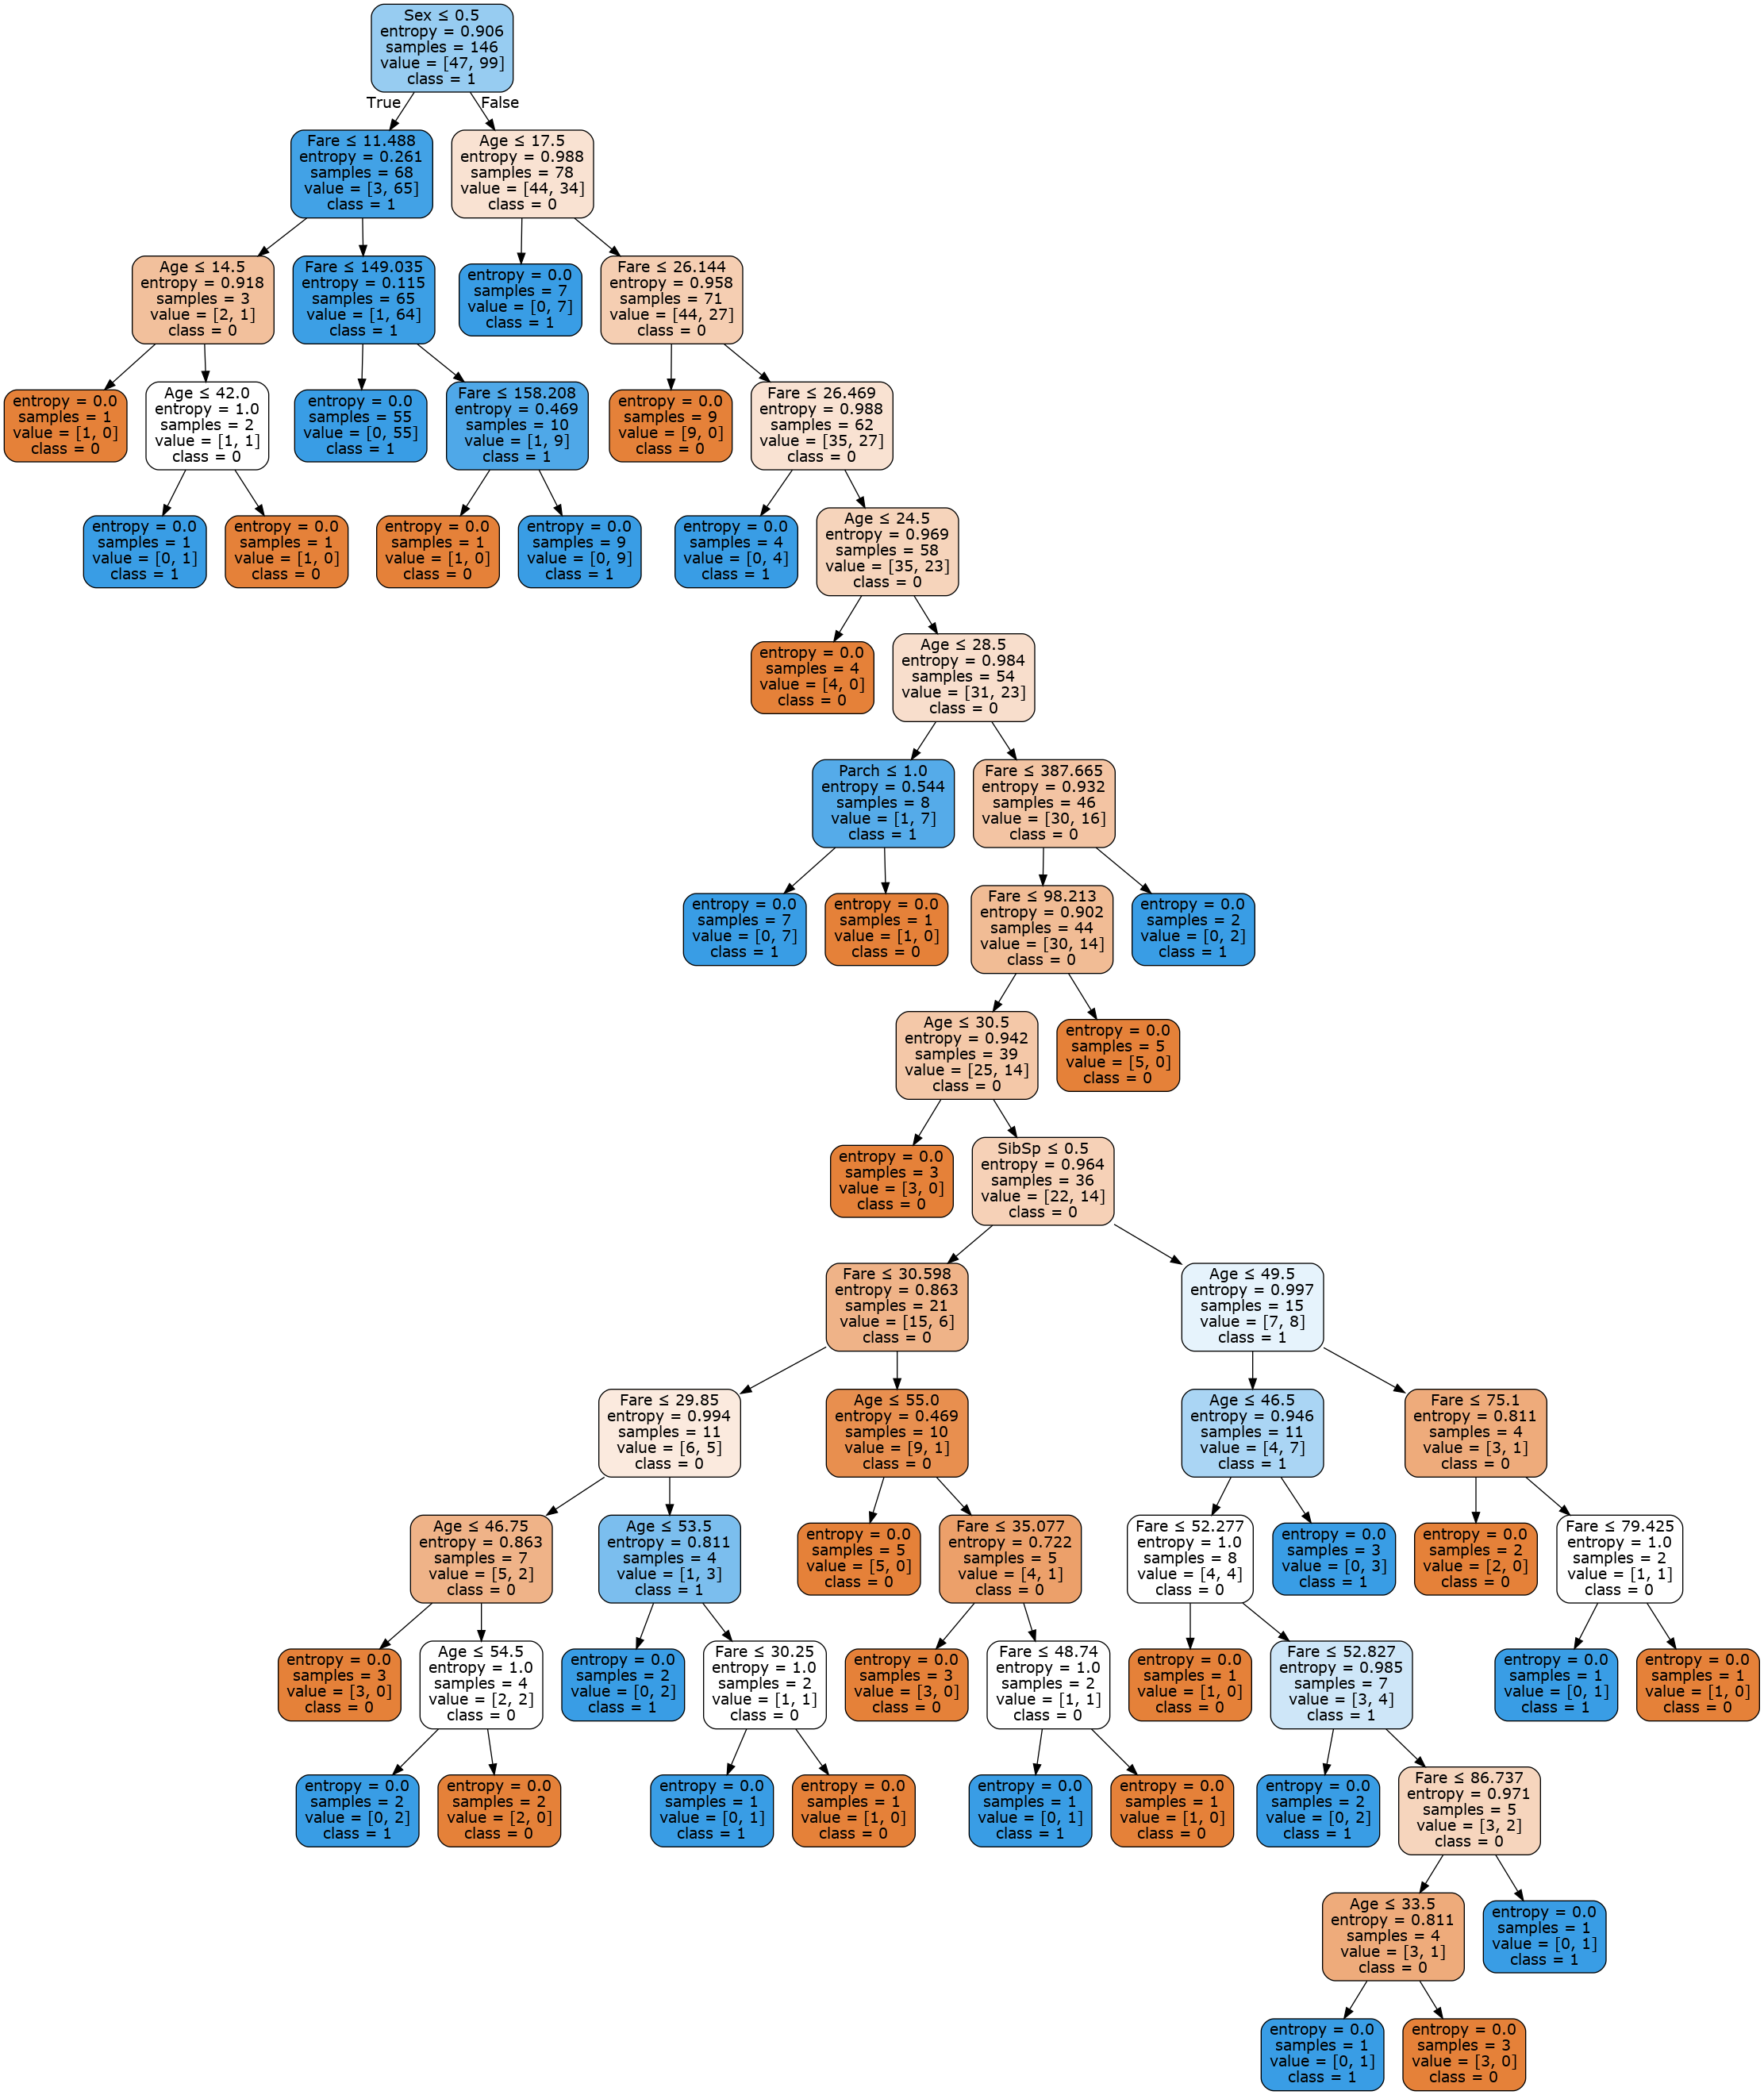

In [32]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

features_cols = selected_cols

class_names=['0','1']
# visualize(dt, features_cols, class_names) # FIXME:

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features_cols,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('titanic.png')
Image(graph.create_png())

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
# Evaluate
Y_pred = dt.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

[[10  3]
 [ 7 17]]
72.97%


In [35]:
# TODO: Changez des différents paramètres pour changer la qualité

### Exercice 3. Random forest

In [36]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = ....
# Number of features to consider at every split
max_features = ...
# Maximum number of levels in tree
max_depth = ...
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = ...
# Minimum number of samples required at each leaf node
min_samples_leaf = ...
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

SyntaxError: invalid syntax (3906108753.py, line 4)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
# TODO: Accuracy:  83.18%